#  BM20A6100 Advanced Data Analysis and Machine Learning
## Erik Kuitunen, 0537275

### Task 1


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("housing.csv")
col_names = df.columns.tolist() 

df
col_names

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value',
 'ocean_proximity']

### 1. Cleaning data and dividing into train and test sets
Removing missing data rows and categorical data

In [22]:
from sklearn.model_selection import train_test_split

# Remove missing lines and categorical data column (the last column)
col_names = col_names[ :-1 ]
df_clean = df.dropna()
df_clean = df[ col_names ]


XData = df_clean.iloc[ :, 0:-1 ]
YData = df_clean.iloc[ :, -1 ]

# Splitting
Xcalib, Xtest, ycalib, ytest = train_test_split( XData, YData, test_size = 0.25, random_state= 42 )

### 2. Scaling and centering

longitude                Axes(0.125,0.53;0.110714x0.35)
latitude              Axes(0.257857,0.53;0.110714x0.35)
housing_median_age    Axes(0.390714,0.53;0.110714x0.35)
total_rooms           Axes(0.523571,0.53;0.110714x0.35)
total_bedrooms        Axes(0.656429,0.53;0.110714x0.35)
population            Axes(0.789286,0.53;0.110714x0.35)
households               Axes(0.125,0.11;0.110714x0.35)
median_income         Axes(0.257857,0.11;0.110714x0.35)
dtype: object

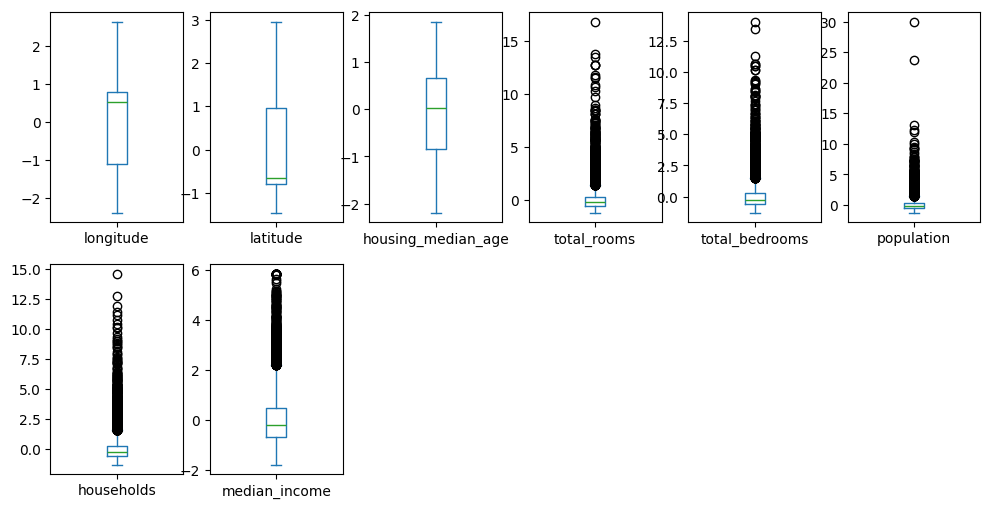

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit( Xcalib )
Xcalib_scaled = pd.DataFrame( scaler.transform( Xcalib ), columns = col_names[ :-1 ] )
Xtest_scaled = pd.DataFrame( scaler.transform( Xtest ), columns = col_names[ :-1 ] )

Xcalib_scaled.plot( 
    kind = "box",
    subplots = True, 
    sharey = False, 
    layout = (2, 6), 
    figsize = (12, 6)
)



### 3. PLS and PCR 

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': 'Cumulative explained variance\n 8 Principal Components explain [100.0%] of the variance.'}, xlabel='Principal Component', ylabel='Percentage explained variance'>)

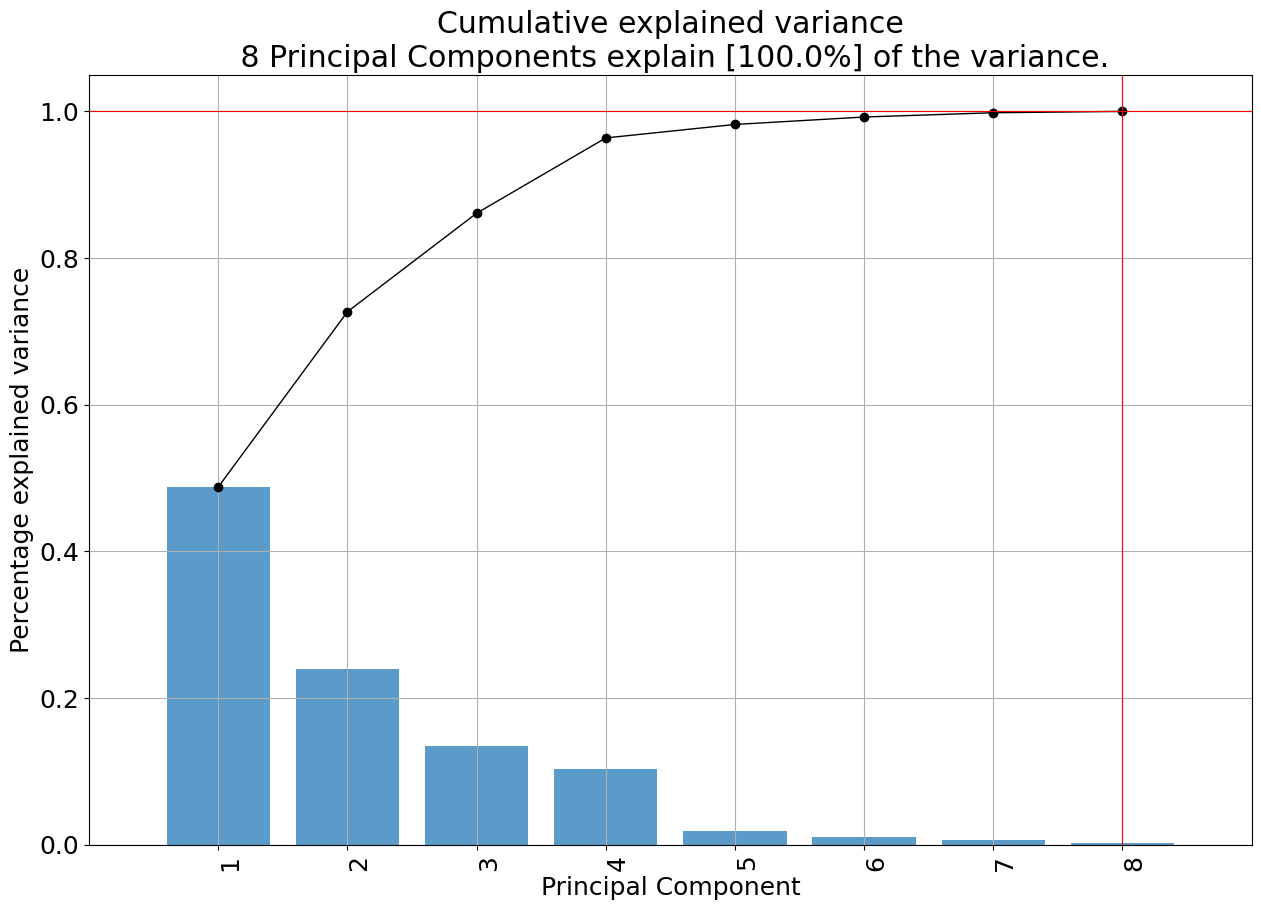

In [50]:
from pca import pca

# First the PCA
model0 = pca( n_components = Xcalib.shape[1], detect_outliers = [] )
results0 = model0.fit_transform( Xcalib_scaled )

model0.plot()

In [91]:
# Extracting loadings, calculating scores
P0 = results0["loadings"].to_numpy()
T0 = Xcalib_scaled.to_numpy() @ P0   #Scores

# Calculating MLR coefficients
q0 = np.linalg.pinv( T0.T @ T0 ) @ T0.T @ ycalib.to_numpy()
b0_PCR = P0 @ np.expand_dims( q0, axis = 1 )



array([[-85633.72042307],
       [-90688.57483942],
       [ 14784.88264045],
       [-17797.74616083],
       [ 50536.11981916],
       [-43700.25590533],
       [ 15889.04638533],
       [ 76852.68796621]])